# Алгоритмы одномерной оптимизации

В этом блокноте содержатся примеры реализации методов одномерной оптимизации, а также примеры использования функций пакета `scipy.optimize` для решения задач одномерной оптимизации.

Выполните блокнот (`Cell>Run All`), чтобы иметь возможность изучить работу методов в пошаговом режиме.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline
from matplotlib import rcParams
rcParams.update({'font.size': 14})
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
import ipywidgets as widgets


# Тестовые функции

## Парабола

$$ f(x) = x^2 - x $$

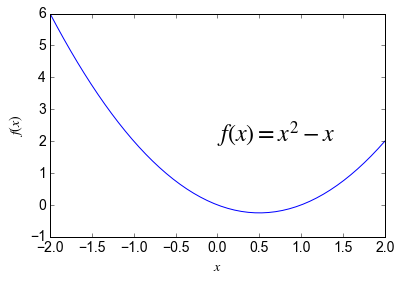

In [2]:
x = sp.symbols('x')

# Парабола
f = lambda x: x**2 - x # численное определение
fs = x**2 - x # символьное определение

X = np.linspace(-2, 2)
plt.plot(X, f(X))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.text(0,2,'$f(x)=x^2-x$', fontsize=24);

In [3]:
# Аналитическое решение
fs_xmin = sp.solve(fs.diff(x), x)[0].evalf()
fs_min = fs.subs(x, fs_xmin).evalf()

print('Аналитический минимум: %.2f в точке %.2f' % (fs_min, fs_xmin))

Аналитический минимум: -0.25 в точке 0.50


## Полином четвертой степени

$$ g(x) = x^4 - x + 1 $$

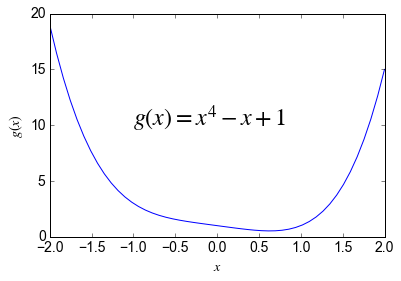

In [4]:
# Полиномиальная функция
g = lambda x: x**4 - x + 1 # Численное определение
gs = x**4 - x + 1 # Символьное определение

plt.plot(X, g(X), 'b')
plt.xlabel('$x$')
plt.ylabel('$g(x)$')
plt.text(-1,10,'$g(x)=x^4-x+1$', fontsize=24);


In [5]:
# Аналитическое решение
gs_xmin = sp.solve(gs.diff(x), x)[0].evalf()
gs_min = gs.subs(x, gs_xmin).evalf()

print('Аналитический минимум: %.2f в точке %.2f' % (gs_min, gs_xmin))

Аналитический минимум: 0.53 в точке 0.63


# Визуализация работы методов

## Метод сканирования

Метод сканирования (grid search) предполагает полный перебор значений функции из заданного интервала с заданным шагом

### Реализация метода сканирования

In [6]:
def grid_search(f, a=-1, b=1, n=21, path=True, trace=False):
    """
    Минимизация функции одной переменной методом сканирования. 
    При наличии нескольких минимумов с одинаковым значением функции, возвращается первый.
    
    Аргументы:
    f - функция для минимизации
    a и b - границы интервала поиска минимума: [a, b]
    n - число шагов
    path - нужно ли возвращать траекторию поиска
    trace - нужно ли печатать шаги поиска
    
    Возвращает кортеж: (x_min, f_min), если не требуется возвращать траекторию
    или кортеж: (x_min, f_min, xpath, ypath), где xpath, ypath - списки с координатами точек траектории поиска        
    """
    
    assert b != a, "Правая граница интервала не должна совпадать с левой!"
    
    s = (b - a) / (n - 1)  # Шаг
    
    xpath = [] # Точки траектории поиска
    ypath = []
    
    best = () # Текущий минимум
    
    if trace:
        print('Шаг\tx\tf(x)')        
    
    for i in range(n):
        x = a + i * s
        fx = f(x)
        
        if trace:
            print('%d\t%+.2f\t%+.2f'%(i+1, x, fx))
            
        if path: # добавляем координаты точки в траекторию
            xpath.append(x)
            ypath.append(fx)
        
        
        if len(best) == 0 or best[1] > fx: # обновляем минимум
            best = (x, fx)
        
    if path:
        return best + (xpath, ypath)
    else:
        return best
    

In [7]:
def vis_path(f, xmin, fmin, xpath, ypath, ns=51):
    """
    Визуализация точки минимума и траектории поиска
    Аргументы:
    f - функция
    xmin, fmin - координаты точки минимума 
    xpath, ypath - кортежи с x и y координатами точек траектории поиска
    ns - число точек для рисования функции
    """
    
    # Границы диапазона для визуализации
    X=np.linspace(min(xpath), max(xpath), ns)
    
    # График функции
    plt.plot(X, f(X), 'b', label='$f(x)$')
    
    # Траектория поиска:
    plt.plot(xpath, ypath, 'bo', label='Траектория поиска')
    
    for (i, (x, y)) in enumerate(zip(xpath, ypath)):
        plt.text(x*1.0, y*1.0, str(i+1), fontsize=10)
    
    # Минимум:
    plt.plot(xmin, fmin, 'r*', label='Минимум', markersize=14)
    
    

### Проверка на параболической функции (сканирование)

Шаг	x	f(x)
1	-1.00	+2.00
2	-0.80	+1.44
3	-0.60	+0.96
4	-0.40	+0.56
5	-0.20	+0.24
6	+0.00	+0.00
7	+0.20	-0.16
8	+0.40	-0.24
9	+0.60	-0.24
10	+0.80	-0.16
11	+1.00	+0.00
Минимум: -0.24 при x = 0.40
Аналитический минимум: -0.25 при x= 0.50


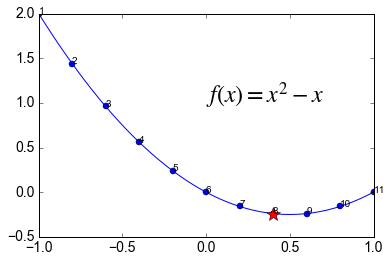

In [8]:
# Проверка на параболической функции:
xmin, fmin, xpath, ypath = grid_search(f, n=11, trace=True)
vis_path(f, xmin, fmin, xpath, ypath)
plt.text(0,1,'$f(x)=x^2-x$', fontsize=24)
print("Минимум: %.2f при x = %.2f" %(fmin, xmin))
print("Аналитический минимум: %.2f при x= %.2f" % (fs_min, fs_xmin))

Минимум найден не точно. Можно уточнить минимум, проведя поиск в более узком интервале, включающем найденный минимум.

### Проверка на полиномиальной функции (сканирование)

Шаг	x	f(x)
1	-1.00	+3.00
2	-0.80	+2.21
3	-0.60	+1.73
4	-0.40	+1.43
5	-0.20	+1.20
6	+0.00	+1.00
7	+0.20	+0.80
8	+0.40	+0.63
9	+0.60	+0.53
10	+0.80	+0.61
11	+1.00	+1.00
Минимум: 0.53 при x = 0.60
Аналитический минимум: 0.53 при x= 0.63


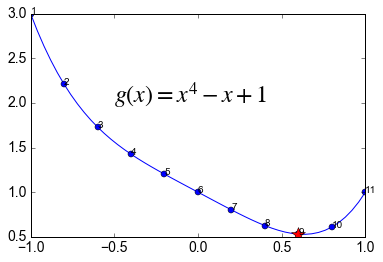

In [9]:
# Проверка на полиномиальной функции:
xmin, fmin, xpath, ypath = grid_search(g, n = 11, trace=True)
vis_path(g, xmin, fmin, xpath, ypath)
plt.text(-.5, 2,'$g(x)=x^4-x+1$', fontsize=24)
print("Минимум: %.2f при x = %.2f" %(fmin, xmin))
print("Аналитический минимум: %.2f при x= %.2f" % (gs_min, gs_xmin))

## Метод локализации экстремума

В методе локализации экстремума интервал $[a, b]$ делится на 4 равных отрезка. Вычисляется значение функции на концах каждого отрезка. Затем выбираются 2 отрезка, смежных с точкой, в которой достигается минимальное значение функции из всех найденных. Полученный интервал, равный объединению двух этих отрезков, снова делится на 4 равных отрезка. Поиск продолжается до тех пор, пока не будет достигнута заданная точность локализации экстремума.

### Реализация метода локализации

In [10]:
def bracket_search(f, a=-1, b=1, eps=0.01, path=False, trace=False):
    """
    Минимизация функции одной переменной методом локализации экстремума.    
    
    Аргументы:
    f - функция для минимизации
    a и b - границы интервала поиска минимума: [a, b]
    eps - точность локализации экстремума
    path - нужно ли возаращать траекторию поиска
    trace - нужно ли выводить шаги поиска
    
    Возвращает кортеж: (x_min, f_min), если не требуется возвращать траекторию
    или кортеж: (x_min, f_min, brackets), где brackets - спискок с интервалами локализации минимума
    """
    
    assert b > a, "Правая граница интервала должна быть больше левой!"
        
    brackets = [] # Точки траектории поиска

    if trace:
        print('Шаг\ta\tb\tx*\tf(x*)')        
    
    s = 0
    xmin = 0
    fmin =0
    while (b - a >= eps):
        s+=1
        
        delta = (b - a) / 4
        X = np.array([a, a + delta, a + 2 * delta, a + 3 * delta, b])
        F = f(X)
        
        ibest = F.argmin()
        brackets.append((X.copy(), F.copy(), ibest))
        
        if trace:
            print('%d\t%+.2f\t%+.2f\t%+.2f\t%+.2f'%(s, a, b, X[ibest], F[ibest]))        
        
        a = X[ibest-1]
        b = X[ibest+1]
        xmin = X[ibest]
        fmin = F[ibest]
        
        
        
        
    if path:
        return (xmin, fmin, brackets)
    else:
        return (xmin, fmin)

    

In [11]:
def vis_bracket(f, brackets, step=None, ns=51):
    """
    Визуализация точки минимума и траектории поиска
    Аргументы:
    f - функция
    brackets - список кортежей с координатами отрезков
    step - номер шага, для которого необходимо построить отрезок локализации экстремума    
    ns - число точек для рисования функции
    """
    if step is None:
        step = len(brackets)
    assert step >= 1 and step <= len(brackets), "Недопустимый номер шага!"
    Xb = brackets[step - 1][0]
    Fb = brackets[step - 1][1]
    ibest = brackets[step - 1][2]
    
    a = Xb[0]
    b = Xb[-1]
    # Границы диапазона для визуализации
    X=np.linspace(a, b, ns)
    
    # График функции
    plt.plot(X, f(X), 'b', label='$f(x)$')
    
    # Интервал локализации экстремума:
    plt.plot(Xb, Fb, 'bo', label='Интервал локализации')
    
    #    for (i, (x, y)) in enumerate(zip(xpath, ypath)):
    #        plt.text(x*1.0, y*1.0, str(i+1), fontsize=10)
    
    # Минимум:
    plt.plot(Xb[ibest], Fb[ibest], 'r*', label='Минимум', markersize=14)
    plt.title('Интервал на шаге %s: [%.2f, %.2f],\nНаименьшая точка: (%.2f, %.2f)' % (step, a, b, Xb[ibest], Fb[ibest]))
    plt.tight_layout();

    

In [12]:
def vis_convergence(brackets, true_xbest=None, true_fbest=None):
    """
    Визуализация сходимости метода
    Аргументы:
    brackets - список кортежей с координатами отрезков
    true_xbest - истинное значение точки минимума
    true_fbest - истинное значение минимума
    """

    Fsteps = np.zeros_like(brackets)
    Xsteps = np.zeros_like(brackets)
    Dsteps = np.zeros_like(brackets)
    
    for step, bracket in enumerate(brackets):
        bracket = brackets[step]  # Данные на текущем шаге 
        X = bracket[0] # Абсциссы точек интервала
        F = bracket[1] # Ординаты точек интервала
        ibest = bracket[2] # Индекс лучшей точки
        Xsteps[step] = X[ibest] # Абсцисса лучшей точки на шаге
        Fsteps[step] = F[ibest] # Ордината лучшей точки на шаге
        Dsteps[step] = X[-1] - X[0] # Ширина интервала локализации на шаге
    
        
    # Номера шагов
    S = np.arange(1, len(Fsteps)+1)

    # Визуализация сходимости по значению критерия    
    plt.step(S, Fsteps, 'b-', label='Наилучшее значение критерия на шаге')
    plt.xlabel('Номер шага')
    plt.ylabel('Минимум')
    plt.title('Сходимость по значению критерия')    
    if not true_fbest is None:
        plt.axhline(true_fbest, ls='dashed', color='red')            
    plt.tight_layout()
    plt.show()
    
    # Визуализация сходимости по переменной    
    plt.step(S, Xsteps, 'g-', label='Точка минимума на шаге')
    plt.xlabel('Номер шага')
    plt.ylabel('Точка минимума')
    plt.title('Сходимость по переменной')    
    if not true_xbest is None:
        plt.axhline(true_xbest, ls='dashed', color='red')            
    plt.tight_layout()
    plt.show()
    
    # Визуализация сходимости по ширине интервала
    plt.step(S, Dsteps, 'c-', label='Ширина интервала')
    plt.xlabel('Номер шага')
    plt.ylabel('Ширина интервала')
    plt.title('Сходимость по ширине интервала локализации')    
    plt.tight_layout()
    plt.show();

### Проверка на параболической функции (локализация)

In [13]:
xmin, fmin, bracketslf = bracket_search(f, a=-3, b=2, path=True, trace=True)

Шаг	a	b	x*	f(x*)
1	-3.00	+2.00	+0.75	-0.19
2	-0.50	+2.00	+0.75	-0.19
3	+0.12	+1.38	+0.44	-0.25
4	+0.12	+0.75	+0.44	-0.25
5	+0.28	+0.59	+0.52	-0.25
6	+0.44	+0.59	+0.52	-0.25
7	+0.48	+0.55	+0.50	-0.25
8	+0.48	+0.52	+0.50	-0.25
9	+0.49	+0.51	+0.50	-0.25


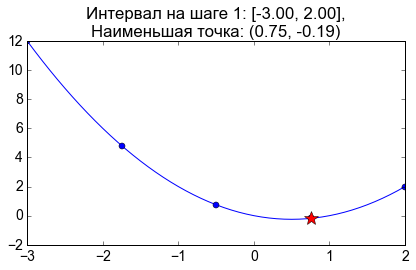

In [14]:
def interact_lf(step=1):
    vis_bracket(f, bracketslf, step)
    
widgets.interact(interact_lf, step=(1, len(bracketslf)));

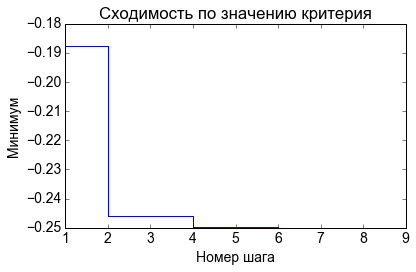

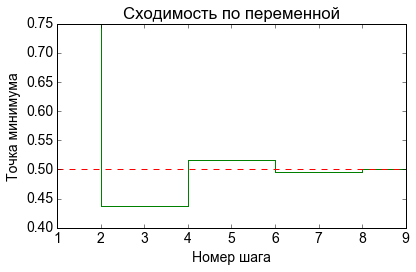

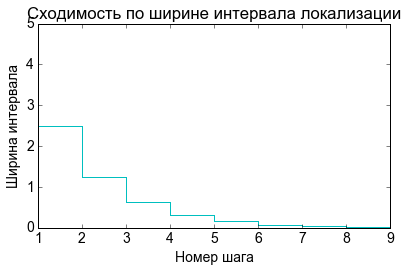

In [15]:
vis_convergence(bracketslf, fs_xmin, fs_min)

### Проверка на полиномиальной функции (локализация)

In [16]:
xmin, fmin, bracketslg = bracket_search(g, a=-2, b=2, path=True, trace=True)

Шаг	a	b	x*	f(x*)
1	-2.00	+2.00	+0.00	+1.00
2	-1.00	+1.00	+0.50	+0.56
3	+0.00	+1.00	+0.50	+0.56
4	+0.25	+0.75	+0.62	+0.53
5	+0.50	+0.75	+0.62	+0.53
6	+0.56	+0.69	+0.62	+0.53
7	+0.59	+0.66	+0.62	+0.53
8	+0.61	+0.64	+0.63	+0.53
9	+0.62	+0.64	+0.63	+0.53


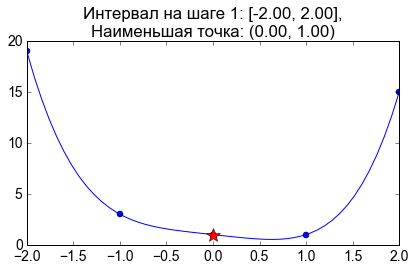

In [17]:
def interact_lg(step=1):
    vis_bracket(g, bracketslg, step)
    
widgets.interact(interact_lg, step=(1, len(bracketslg)));

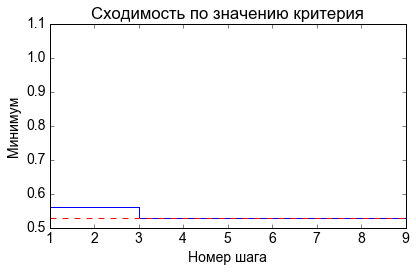

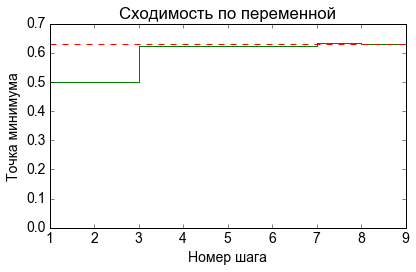

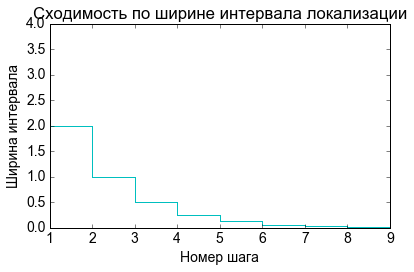

In [18]:
vis_convergence(bracketslg, gs_xmin, gs_min)

### Сходимость метода локализации экстремума

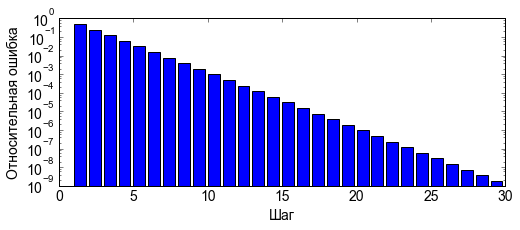

In [19]:
# Относительная ошибка метода локализации экстремума
s = np.arange(1, 30, dtype=np.float64)
plt.figure(figsize=(8,3))
plt.bar(s, 2**(-s), log='y')
plt.xlabel('Шаг')
plt.ylabel('Относительная ошибка');

## Метод золотого сечения

В отличие от метода локализации экстремума, здесь две центральные точки интервала получаются не путем половинного деления, а с помощью золотого сечения (большая часть - ~62% от длины целого интервала). Критерий вычисляется только для двух внутренних точек. В качестве следующего интервала локализации выбираются два смежных подинтервала, содержащих точку с наименьшим значением критерия. Одна из внутренних точек всегда будет внутренней точкой на следующей итерации, поэтому на каждой итерации необходимо добавить только одну внутреннюю точку и критерий вычисляется только один раз.

### Реализация метода золотого сечения

In [20]:
def gold_search(f, a=-1, b=1, eps=0.01, path=False, trace=False):
    """
    Минимизация функции одной переменной методом золотого сечения.    
    
    Аргументы:
    f - функция для минимизации
    a и b - границы интервала поиска минимума: [a, b]
    eps - точность локализации экстремума
    path - нужно ли возаращать траекторию поиска
    trace - нужно ли выводить шаги поиска
    
    Возвращает кортеж: (x_min, f_min), если не требуется возвращать траекторию
    или кортеж: (x_min, f_min, brackets), где brackets - спискок с интервалами локализации минимума
    """
    
    assert b > a, "Правая граница интервала должна быть больше левой!"
        
    brackets = [] # Точки траектории поиска

    if trace:
        print('Шаг\ta\tb\tx*\tf(x*)')        
    
    s = 0
    xmin = 0
    fmin =0
    
    k = (np.sqrt(5) - 1) / 2 # коэффициент для золотого сечения
    
    
    
    while (b - a >= eps):
        s+=1
        
        golden = (b - a) * k # длина большего отрезка при золотом сечении
        X = np.array([a, b - golden, a + golden, b])
        
        
        # Критерий вычисляется только для внутренних точек, но для визуализации необходимы координаты всех точек
        F = f(X)        
                
        if F[1] < F[2]: #минимум локализован на левом подинтервале (ac)
            ibest = 1
            if trace:
                print('%d\t%+.2f\t%+.2f\t%+.2f\t%+.2f'%(s, a, b, X[ibest], F[ibest]))        
            b = X[ibest + 1] #перемещаем ближе правую границу интервала локализации
            
        else:
            ibest=2
            if trace:
                print('%d\t%+.2f\t%+.2f\t%+.2f\t%+.2f'%(s, a, b, X[ibest], F[ibest]))                    
            a = X[ibest - 1] #перемещаем ближе левую границу интервала локализации
        
        xmin = X[ibest]
        fmin = F[ibest]
        brackets.append((X.copy(), F.copy(), ibest))
        
        
        
    if path:
        return (xmin, fmin, brackets)
    else:
        return (xmin, fmin)

### Проверка на параболической функции (золотое сечение)

In [21]:
xmin, fmin, bracketsgf = gold_search(f, a=-3, b=2, path=True, trace=True)

Шаг	a	b	x*	f(x*)
1	-3.00	+2.00	+0.09	-0.08
2	-1.09	+2.00	+0.82	-0.15
3	+0.09	+2.00	+0.82	-0.15
4	+0.09	+1.27	+0.54	-0.25
5	+0.09	+0.82	+0.54	-0.25
6	+0.37	+0.82	+0.54	-0.25
7	+0.37	+0.65	+0.48	-0.25
8	+0.37	+0.54	+0.48	-0.25
9	+0.43	+0.54	+0.50	-0.25
10	+0.48	+0.54	+0.50	-0.25
11	+0.48	+0.52	+0.50	-0.25
12	+0.49	+0.52	+0.50	-0.25
13	+0.49	+0.51	+0.50	-0.25


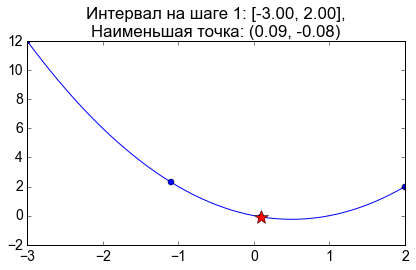

In [22]:
def interact_gf(step=1):
    vis_bracket(f, bracketsgf, step)
    
widgets.interact(interact_gf, step=(1, len(bracketsgf)));

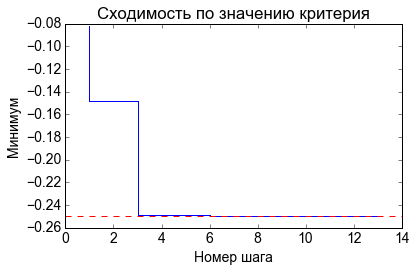

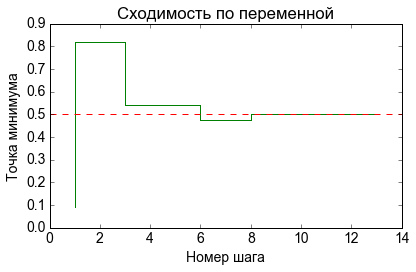

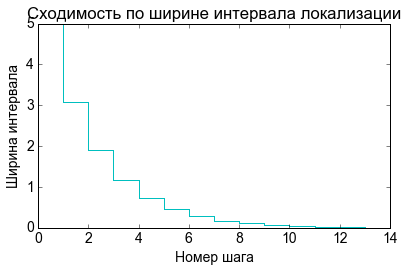

In [23]:
vis_convergence(bracketsgf, fs_xmin, fs_min)

### Проверка на полиномиальной функции (золотое сечение)

In [24]:
xmin, fmin, bracketsgg = gold_search(g, a=-2, b=2, path=True, trace=True)

Шаг	a	b	x*	f(x*)
1	-2.00	+2.00	+0.47	+0.58
2	-0.47	+2.00	+0.47	+0.58
3	-0.47	+1.06	+0.47	+0.58
4	+0.11	+1.06	+0.70	+0.54
5	+0.47	+1.06	+0.70	+0.54
6	+0.47	+0.83	+0.61	+0.53
7	+0.47	+0.70	+0.61	+0.53
8	+0.56	+0.70	+0.64	+0.53
9	+0.61	+0.70	+0.64	+0.53
10	+0.61	+0.66	+0.63	+0.53
11	+0.61	+0.64	+0.63	+0.53
12	+0.62	+0.64	+0.63	+0.53
13	+0.62	+0.63	+0.63	+0.53


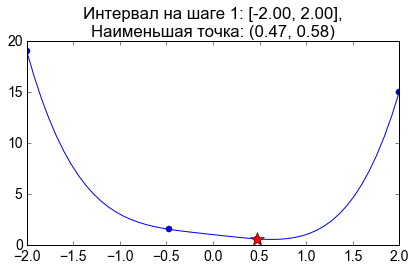

In [25]:
def interact_gg(step=1):
    vis_bracket(g, bracketsgg, step)
    
widgets.interact(interact_gg, step=(1, len(bracketsgg)));

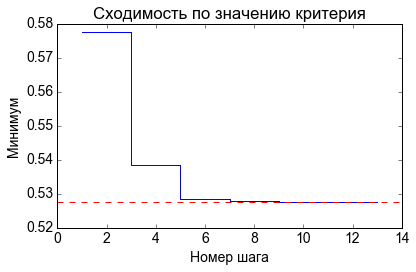

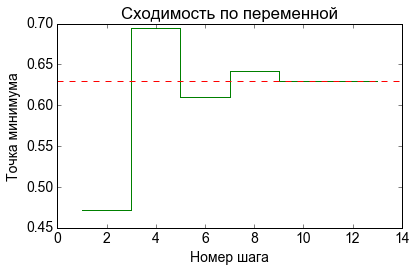

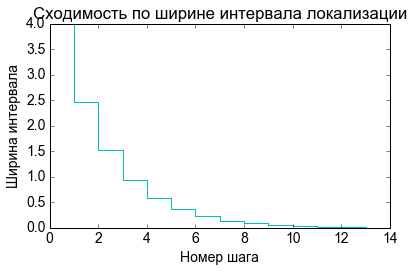

In [26]:
vis_convergence(bracketsgg, gs_xmin, gs_min)

### Сходимость метода золотого сечения

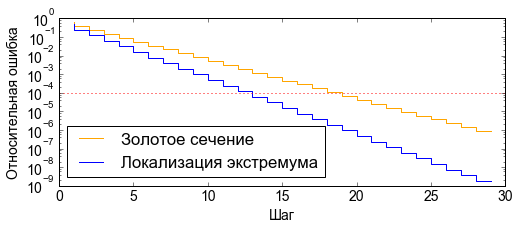

In [27]:
# Относительная ошибка метода золотого сечения
s = np.arange(1, 30, dtype=np.float64)
plt.figure(figsize=(8,3))
plt.step(s, (0.5*(np.sqrt(5)-1))**s, color='orange', label='Золотое сечение')
plt.step(s, 0.5**s, color='blue', label='Локализация экстремума')
plt.xlabel('Шаг')
plt.semilogy()
plt.axhline(1e-4, ls='dotted', color='red')
plt.legend(loc='best')
plt.ylabel('Относительная ошибка');

In [28]:
(0.5*(np.sqrt(5)-1))**2

0.38196601125010521

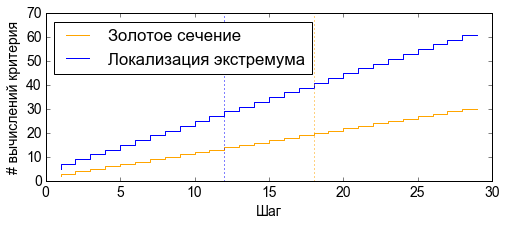

In [29]:
# Количество вычислений критерия
s = np.arange(1, 30, dtype=np.float64)
plt.figure(figsize=(8,3))
plt.step(s, 2 + s - 1, color='orange', label='Золотое сечение')
plt.step(s, 5 + 2 * (s - 1), color='blue', label='Локализация экстремума')
plt.xlabel('Шаг')
#plt.semilogy()
plt.legend(loc='best')
plt.axvline(12, ls='dotted', color='blue')
plt.axvline(18, ls='dotted', color='orange')
plt.ylabel('# вычислений критерия');

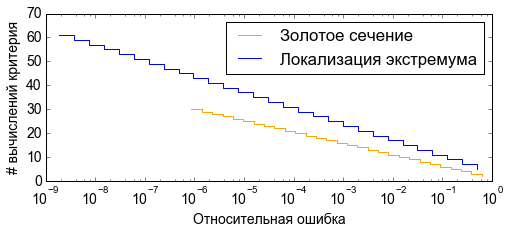

In [30]:
# Количество вычислений критерия для достижения заданной относительной ошибки
s = np.arange(1, 30, dtype=np.float64)
plt.figure(figsize=(8,3))
plt.step((0.5*(np.sqrt(5)-1))**s, 2 + s - 1,  color='orange', label='Золотое сечение')
plt.step(0.5**s, 5 + 2 * (s - 1),  color='blue', label='Локализация экстремума')
plt.xlabel('Относительная ошибка')
plt.semilogx()
plt.legend(loc='best')
plt.ylabel('# вычислений критерия');

## Метод параболической аппроксимации

Метод основан на аппроксимации функции $f(x)$ по трем точкам параболой: $g(x)=a+bx+cx^2$. Для параболы легко вычислить координаты экстремума: $$\tilde{x} = - \frac{b}{2c} $$

### Реализация метода параболической аппроксимации

In [31]:
def create_matrix(X, F):
    """
    Вспомогательная функция, которая создает матрицы системы уравений для нахождения коэффициентов параболы
    
    Аргументы:
    X - массив из трех абсцисс точек
    F - массив из трех ординат точек
    
    Возвращает: кортеж (A, B), где A - матрица коэффициентов системы, а B - вектор свободных членов
    """
    A = np.matrix([
    [1, X[0], X[0]**2],
    [1, X[1], X[1]**2],
    [1, X[2], X[2]**2]
    ])
    B = np.array([F[0], F[1], F[2]])
    return A, B

def parabolic_search(f, a=-1, b=1, eps=0.01, path=False, trace=False):
    """
    Минимизация функции одной переменной методом параболической аппроксимации.    
    
    Аргументы:
    f - функция для минимизации
    a и b - границы интервала поиска минимума: [a, b]
    eps - точность локализации экстремума (относительная разность между значением целевой функции и параболы)
    path - нужно ли возаращать траекторию поиска
    trace - нужно ли выводить шаги поиска
    
    Возвращает кортеж: (x_min, f_min), если не требуется возвращать траекторию
    или кортеж: (x_min, f_min, brackets), где brackets - спискок с интервалами локализации минимума
    """
    
    assert b > a, "Правая граница интервала должна быть больше левой!"
        
    brackets = [] # Точки траектории поиска

    if trace:
        print('Шаг\tx1\tx2\tx3\tx*\tf(x*)')        
    
    s = 0
    xmin = 0
    fmin = 0
    
    X = np.array([a, (b-a)/2, b])
    
    
    while True:
        s+=1
        
        # Вычисление целевой функции в точках
        F = f(X)
        
        # Решение системы уравнений: f(x_i) = a + b * x_i + c * x_i**2
        
        while True: # Если получилась сингулярная матрица, то подвинуть среднюю точку случайным образом
            A, B = create_matrix(X, F)
            if np.linalg.det(A) != 0:
                break
            else:
                X[1] = X[0] + np.random.uniform(.05, .95, 1) * (X[2] - X[0])
                #X[1] = X[1] - (X[1] - X[0])/2
                F = f(X)
        
        C = np.ravel(A.I.dot(B)) # Коэффициенты параболы
        a = C[0]
        b = C[1]
        c = C[2]
        
        x1 = X[0]
        x2 = X[1]
        x3 = X[2]
        
        f1 = F[0]
        f2 = F[1]
        f3 = F[2]
    
        # Новая оценка минимума
        x_opt = - b / (2 * c)
        f_opt = f(x_opt)
        
        if trace:
            print('%s\t%+.2f\t%+.2f\t%+.2f\t%+.2f\t%+.2f' %(s, x1, x2, x3, x_opt, f_opt))        
        
        
        brackets.append((x_opt, f_opt, X.copy(), F.copy(), C.copy()))
        
        # Окончание поиска по совпадению значения целевой функции и параболы:
        g_opt = a + b * x_opt + c * x_opt**2
        if len(brackets) > 1 and np.abs(brackets[-2][0] - x_opt) < eps: 
        #np.abs(f_opt - g_opt) <= eps * np.abs(f_opt):
            break
        
        # Выбор нового интервала        
        if x_opt >= x2 + eps/2: #Новый минимум правее центральной точки
            if f_opt < f2 and f_opt < f3: #минимум на отрезке x2,x3
                X[0] = x2
                X[1] = x_opt
                X[2] = x3
            else: # Минимум на отрезке x1, x_opt
                X[0] = x1
                X[1] = x2
                X[2] = x_opt
        elif x_opt <= x2 - eps/2: #Новый минимум левее центральной точки
            if f_opt < f1 and f_opt < f2: #минимум на отрезке x1, x2
                X[0] = x1
                X[1] = x_opt
                X[2] = x2
            else: # Минимум на отрезке: [x_opt, x3]
                X[0] = x_opt
                X[1] = x2
                X[2] = x3
        else: # Минимум параболы не изменился => нашли минимум
            break
        
        
        
    if path:
        return (xmin, fmin, brackets)
    else:

        return (xmin, fmin)

In [32]:
def vis_convergence_p(brackets, true_xbest=None, true_fbest=None):
    """
    Визуализация сходимости метода параболической интерполяции
    Аргументы:
    brackets - список кортежей с координатами отрезков
    true_xbest - истинное значение точки минимума
    true_fbest - истинное значение минимума
    """    
    Fsteps = np.zeros(len(brackets))
    Xsteps = np.zeros(len(brackets))
    Dsteps = np.zeros(len(brackets))
    
    for step, bracket in enumerate(brackets):
        bracket = brackets[step]  # Данные на текущем шаге
        x_best = bracket[0]
        f_best = bracket[1]
        X = bracket[2] # Абсциссы точек интервала
        F = bracket[3] # Ординаты точек интервала
        Xsteps[step] = x_best # Абсцисса лучшей точки на шаге
        Fsteps[step] = f_best # Ордината лучшей точки на шаге
        Dsteps[step] = X[-1] - X[0] # Ширина интервала локализации на шаге
    
        
    # Номера шагов
    S = np.arange(1, len(Fsteps)+1)

    # Визуализация сходимости по значению критерия    
    plt.step(S, Fsteps, 'b-', label='Наилучшее значение критерия на шаге')
    plt.xlabel('Номер шага')
    plt.ylabel('Минимум')
    plt.title('Сходимость по значению критерия')    
    if not true_fbest is None:
        plt.axhline(true_fbest, ls='dashed', color='red')            
    plt.tight_layout()
    plt.show()
    
    # Визуализация сходимости по переменной    
    plt.step(S, Xsteps, 'g-', label='Точка минимума на шаге')
    plt.xlabel('Номер шага')
    plt.ylabel('Точка минимума')
    plt.title('Сходимость по переменной')    
    if not true_xbest is None:
        plt.axhline(true_xbest, ls='dashed', color='red')            
    plt.tight_layout()
    plt.show()
    
    # Визуализация сходимости по ширине интервала
    plt.step(S, Dsteps, 'c-', label='Ширина интервала')
    plt.xlabel('Номер шага')
    plt.ylabel('Ширина интервала')
    plt.title('Сходимость по ширине интервала локализации')    
    plt.tight_layout()
    plt.show();

In [33]:
def vis_bracket_p(f, brackets, step=None, ns=51):
    """
    Визуализация точки минимума и траектории поиска для метода параболической аппроксимации
    Аргументы:
    f - функция
    brackets - список кортежей с координатами отрезков
    step - номер шага, для которого необходимо построить отрезок локализации экстремума    
    ns - число точек для рисования функции
    """
    if step is None:
        step = len(brackets)
    assert step >= 1 and step <= len(brackets), "Недопустимый номер шага!"
    
    bracket = brackets[step-1]

    x_best = bracket[0]
    f_best = bracket[1]
    X = bracket[2]
    F = bracket[3]
    C = bracket[4]

    g = lambda x: C[0] + C[1] * x + C[2] * x**2 # Функция для параболы
    
    a = X.min()
    b = X.max()

    # Границы диапазона для визуализации
    XX=np.linspace(a, b, ns)
    
    # График функции
    plt.plot(XX, f(XX), 'b', label='$f(x)$')
    
    # Интервал локализации экстремума:
    plt.plot(X, f(X), 'bo', label='Интервал локализации')
    
    # Парабола:
    plt.plot(XX, g(XX), 'r:', label='$g(x)$')
    
    # Точка минимума:
    plt.plot(x_best, g(x_best), 'rh', label='Минимум параболы', markersize=14)
    plt.plot(x_best, f_best, 'b*', label='Функция в точке минимума', markersize=14)
    
    # Минимум:
    plt.title('Интервал на шаге %s: [%.2f, %.2f],\nНаименьшая точка: (%.2f, %.2f)' % (step, a, b, x_best, f_best))
    plt.tight_layout();

### Проверка на параболической функции (аппроксимация)

In [34]:
xmin, fmin, bracketspf = parabolic_search(f, a=-3, b=2, path=True, trace=True)

Шаг	x1	x2	x3	x*	f(x*)
1	-3.00	+2.50	+2.00	+0.50	-0.25
2	-3.00	+0.50	+2.50	+0.50	-0.25


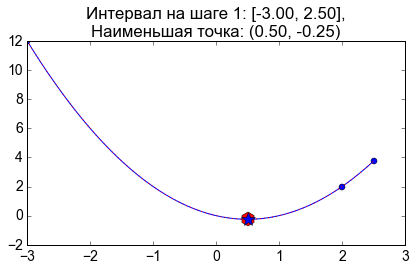

In [35]:
def interact_pf(step=1):
    vis_bracket_p(f, bracketspf, step)

if len(bracketspf) > 1:
    widgets.interact(interact_pf, step=(1, len(bracketspf)));
else:
    vis_bracket_p(f, bracketspf)

### Проверка на полиномиальной функции (аппроксимация)

In [36]:
xmin, fmin, bracketspg = parabolic_search(g, a=-2, b=2, path=True, trace=True)

Шаг	x1	x2	x3	x*	f(x*)
1	-2.00	-1.46	+2.00	+0.08	+0.92
2	-1.46	+0.08	+2.00	-0.09	+1.09
3	-0.09	+0.08	+2.00	+0.12	+0.88
4	+0.08	+0.12	+2.00	+0.21	+0.79
5	+0.12	+0.21	+2.00	+0.27	+0.73
6	+0.21	+0.27	+2.00	+0.33	+0.68
7	+0.27	+0.33	+2.00	+0.38	+0.64
8	+0.33	+0.38	+2.00	+0.43	+0.60
9	+0.38	+0.43	+2.00	+0.47	+0.58
10	+0.43	+0.47	+2.00	+0.50	+0.56
11	+0.47	+0.50	+2.00	+0.52	+0.55
12	+0.50	+0.52	+2.00	+0.54	+0.54
13	+0.52	+0.54	+2.00	+0.56	+0.54
14	+0.54	+0.56	+2.00	+0.58	+0.53
15	+0.56	+0.58	+2.00	+0.59	+0.53
16	+0.58	+0.59	+2.00	+0.60	+0.53


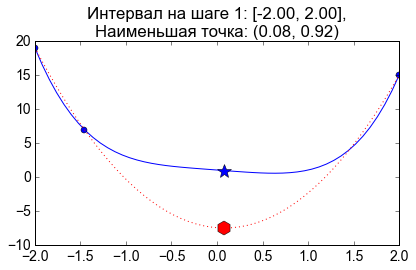

In [37]:
def interact_pg(step=1):
    vis_bracket_p(g, bracketspg, step)
    
widgets.interact(interact_pg, step=(1, len(bracketspg)));

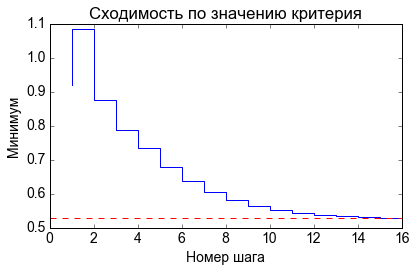

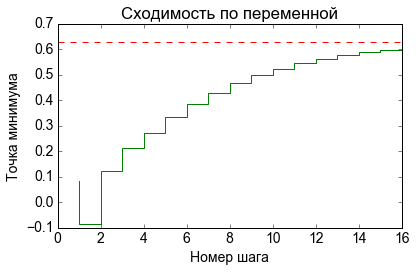

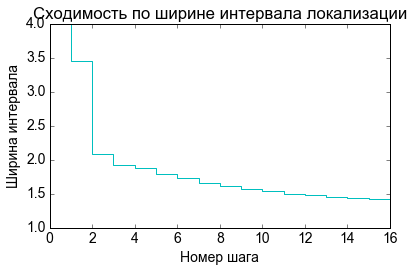

In [38]:
vis_convergence_p(bracketspg, gs_xmin, gs_min)

# Функции пакета scipy.optimize


Пакет scipy.optimize содержит функцию `minimize_scalar()`, которая реализует методы:
 - Золотого сечения (`minimize_scalar(method=’golden’)`)
 - Брента (`minimize_scalar(method=’brent’)`)
 - Брента с поддержкой границ для оптимизирующей переменной (`minimize_scalar(method=’bounded’)`)
 
Функция возвращает объект типа [OptimizeResult](http://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult), содержащий информацию о результатах работы алгоритма в виде атрибутов:

Атрибут | Тип | Назначение
:- |:- |:-
`x` | `ndarray` | Точка минимума (x)
`success` | `bool` | Истина, если алгоритм успешно завершил работу
`message` | `str` | Текстовое описание статуса завершения - не для всех алгоритмов
`fun` | `ndarray` | Минимум (значение целевой функции в точке x)
`nfev`| `int` | Количество вычислений целевой функции
`nit` | `int` | Количество шагов (итераций) - не для всех алгоритмов
 
 Доступные атрибуты можно увидеть, выполнив метод `keys()` полученного объекта, или используя автовывод/печать.
  
 Функции для оптимизации многомерных функций также могут работать с одномерными функциями.

In [39]:
import scipy.optimize as so # подключение пакета

## Проверка на параболической функции (scipy)

 ### Метод золотого сечения (scipy)
 
 Рекомендуется использовать метод Брента.

In [40]:
res_gf = so.minimize_scalar(f, bracket=(-3, 2), method='golden')

print("Доступные атрибуты: %s" % res_gf.keys())
print("Точка минимума: %.2f, минимум: %.2f. Вычислений функции: %d" 
      % (res_gf.x, res_gf.fun, res_gf.nfev)) 

Доступные атрибуты: dict_keys(['fun', 'nfev', 'x'])
Точка минимума: 0.50, минимум: -0.25. Вычислений функции: 48


### Метод Брента (scipy)

In [41]:
res_brf = so.minimize_scalar(f, bracket=(-3, 2), method='brent')

print("Доступные атрибуты: %s" % res_gf.keys())
print("Точка минимума: %.2f, минимум: %.2f.\nВычислений функции: %d, Итераций: %d" 
      % (res_brf.x, res_brf.fun, res_brf.nfev, res_brf.nit)) 

Доступные атрибуты: dict_keys(['fun', 'nfev', 'x'])
Точка минимума: 0.50, минимум: -0.25.
Вычислений функции: 6, Итераций: 5


### Метод Брента с границами (scipy)

In [42]:
res_bf = so.minimize_scalar(f, bounds=(-3, 2), method='bounded')
print("Доступные атрибуты: %s" % res_bf.keys())
print("Точка минимума: %.2f, минимум: %.2f.\nВычислений функции: %d" 
      % (res_bf.x, res_bf.fun, res_bf.nfev)) 

Доступные атрибуты: dict_keys(['status', 'fun', 'nfev', 'x', 'message', 'success'])
Точка минимума: 0.50, минимум: -0.25.
Вычислений функции: 6


Метод позволяет найти условный минимум на интервале - здесь: $ x \in [1, 2]$

In [43]:
res_bf2 = so.minimize_scalar(f, bounds=(1, 2), method='Bounded')
print("Доступные атрибуты: %s" % res_gf.keys())
print("Точка минимума: %.2f, минимум: %.2f.\nВычислений функции: %d" 
      % (res_brf.x, res_brf.fun, res_brf.nfev)) 

Доступные атрибуты: dict_keys(['fun', 'nfev', 'x'])
Точка минимума: 0.50, минимум: -0.25.
Вычислений функции: 6


In [44]:
res_bf2

  status: 0
     fun: 5.9608965183866047e-06
    nfev: 25
       x: 1.0000059608609866
 message: 'Solution found.'
 success: True

### Метод многомерной оптимизации (scipy)


In [45]:
so.minimize(f, x0=-3)

     njev: 4
     nfev: 12
  message: 'Optimization terminated successfully.'
  success: True
   status: 0
 hess_inv: array([[ 0.5]])
      fun: -0.24999999999999994
        x: array([ 0.49999999])
      jac: array([ 0.])
      nit: 2

## Проверка на полиномиальной функции (scipy)

 ### Метод золотого сечения (scipy, полиномиальная функция)

In [46]:
res_gg = so.minimize_scalar(g, bracket=(-2, 2), method='golden')

print("Точка минимума: %.2f, минимум: %.2f. Вычислений функции: %d" 
      % (res_gg.x, res_gg.fun, res_gg.nfev)) 

Точка минимума: 0.63, минимум: 0.53. Вычислений функции: 47


### Метод Брента (scipy, полиномиальная функция)

In [47]:
res_brg = so.minimize_scalar(g, bracket=(-2, 2), method='brent')

print("Точка минимума: %.2f, минимум: %.2f.\nВычислений функции: %d, Итераций: %d" 
      % (res_brg.x, res_brg.fun, res_brg.nfev, res_brg.nit)) 

Точка минимума: 0.63, минимум: 0.53.
Вычислений функции: 14, Итераций: 13


### Метод Брента с границами (scipy, полиномиальная функция)

In [48]:
# Условный минимум на [-2, 2]
res_bg = so.minimize_scalar(g, bounds=(-2, 2), method='bounded')

print("Точка минимума: %.2f, минимум: %.2f.\nВычислений функции: %d" 
      % (res_bg.x, res_bg.fun, res_bg.nfev)) 

Точка минимума: 0.63, минимум: 0.53.
Вычислений функции: 13


In [49]:
# Условный минимум на [-1, 0]
res_bg2 = so.minimize_scalar(g, bounds=(-1, 0), method='bounded')
print("Доступные атрибуты: %s" % res_gf.keys())
print("Точка минимума: %.2f, минимум: %.2f.\nВычислений функции: %d" 
      % (res_bg2.x, res_bg2.fun, res_bg2.nfev)) 

Доступные атрибуты: dict_keys(['fun', 'nfev', 'x'])
Точка минимума: -0.00, минимум: 1.00.
Вычислений функции: 25


### Метод многомерной оптимизации (scipy, полиномиальная функция)

In [50]:
so.minimize(g, x0=-2)

     njev: 11
     nfev: 33
  message: 'Optimization terminated successfully.'
  success: True
   status: 0
 hess_inv: array([[ 0.20867258]])
      fun: 0.5275296062903264
        x: array([ 0.62995991])
      jac: array([ -2.89827585e-06])
      nit: 6

# Метод Ньютона

Основан на необходимом условии экстремума: $$ f'(x) = 0 $$

Для нахождения нуля производной используется метод Ньютона-Рафсона. Рекуррентная формула: $$ x^{k+1} = x^k - \frac{f'(x^k)}{f''(x^k)} $$

## Реализация метода Ньютона

In [51]:
def newton_search(f, x0, fprime, fsecond, eps=0.01, path=True, trace=True):
    """
    Минимизация функции одной переменной методом Ньютона. 
        
    Аргументы:
    f - функция для минимизации
    x0 - начальное приближение
    fprime - функция, вычисляющая первую производную
    fsecond - функция, вычисляющая вторую производную
    path - нужно ли возвращать траекторию поиска
    trace - нужно ли печатать шаги поиска
    
    Возвращает кортеж: (x_min, f_min), если не требуется возвращать траекторию
    или кортеж: (x_min, f_min, xpath, ypath), где xpath, ypath - списки с координатами точек траектории поиска        
    """
    
    #assert b != a, "Правая граница интервала не должна совпадать с левой!"
    
    
    xpath = [x0] # Точки траектории поиска
    ypath = [f(x0)]
        
    
    if trace:
        print("Шаг\tx\tf(x)\tx*\tf(x*)\tf'(x*)")        
    
    k = 0 # Шаг
    
        
    while True:
        xk = xpath[k]
        k += 1

        xnew = xk - fprime(xk)/fsecond(xk) #Новое приближение экстремума
        xpath.append(xnew)       
        fnew = f(xnew)
        ypath.append(fnew)
        fpnew = fprime(xnew)

        if trace:
            print('%d\t%+.2f\t%+.2f\t%+.2f\t%+.2f\t%+.2f' % (k, xk, f(xk), xnew, fnew, fpnew))

        if np.abs(xnew-xk) < eps or fnew < eps: # Достигнута заданная точность нахождения экстремума
            break

    if path:
        return (xpath[-1], ypath[-1], xpath, ypath)
    else:
        return (xpath[-1], ypath[-1])

In [52]:
def vis_convergence_n(path, true_xbest=None, true_fbest=None):
    """
    Визуализация сходимости метода параболической интерполяции
    Аргументы:
    brackets - список кортежей с координатами отрезков
    true_xbest - истинное значение точки минимума
    true_fbest - истинное значение минимума
    """    
    Fsteps = np.array(path[3])
    Xsteps = np.array(path[2])
    
    # Номера шагов
    S = np.arange(1, len(Fsteps)+1)

    # Визуализация сходимости по значению критерия    
    plt.step(S, Fsteps, 'b-', label='Наилучшее значение критерия на шаге')
    plt.xlabel('Номер шага')
    plt.ylabel('Минимум')
    plt.title('Сходимость по значению критерия')    
    if not true_fbest is None:
        plt.axhline(true_fbest, ls='dashed', color='red')            
    plt.tight_layout()
    plt.show()
    
    # Визуализация сходимости по переменной    
    plt.step(S, Xsteps, 'g-', label='Точка минимума на шаге')
    plt.xlabel('Номер шага')
    plt.ylabel('Точка минимума')
    plt.title('Сходимость по переменной')    
    if not true_xbest is None:
        plt.axhline(true_xbest, ls='dashed', color='red')            
    plt.tight_layout()
    plt.show()    

In [53]:
def vis_path_n(f, xmin, fmin, xpath, ypath, step=None, ns=51):
    """
    Визуализация точки минимума и траектории поиска для метода Ньютона
    Аргументы:
    f - функция
    xmin, fmin - координаты точки минимума 
    xpath, ypath - кортежи с x и y координатами точек траектории поиска
    ns - число точек для рисования функции
    """
    
    # Границы диапазона для визуализации
    X=np.linspace(min(xpath), max(xpath), ns)
    
    # График функции
    plt.plot(X, f(X), 'b', label='$f(x)$')
    
    
    if step is None: # Если шаг не задан, то выводится вся траектория
        plt.plot(xpath, ypath, 'bo', label='Траектория поиска')

        for (i, (x, y)) in enumerate(zip(xpath, ypath)):
            plt.text(x*1.0, y*1.0, str(i+1), fontsize=10)

    else: # Рисуем один шаг        
        plt.plot(xpath[step-1], ypath[step-1], 'bh', label='Траектория поиска', markersize=14)

    # Минимум:
    plt.plot(xmin, fmin, 'r*', label='Минимум', markersize=14)
    
    plt.title('Шаг %s, начальная точка: (%.2f, %.2f)' % (step, xpath[step-1], ypath[step-1]))
    plt.tight_layout()
    plt.show();

    

## Проверка на параболической функции (Ньютон)

Производные функции $f(x) = x^2 - x $: $$f'(x)=2x$$ $$f''(x)=2$$

In [54]:
# Производные функции f
fprime = lambda x : 2 * x - 1
fsecond = lambda x : 2

path_nf = newton_search(f, -3, fprime, fsecond)

Шаг	x	f(x)	x*	f(x*)	f'(x*)
1	-3.00	+12.00	+0.50	-0.25	+0.00


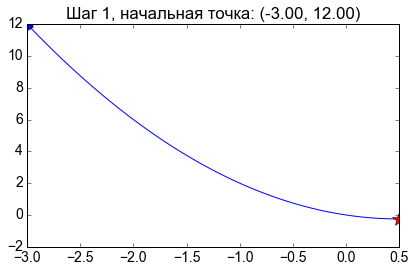

In [55]:
def interact_nf(step=1):
    vis_path_n(f, *path_nf, step=step)
    
widgets.interact(interact_nf, step=(1, len(path_nf[2])));

## Проверка на полиномиальной функции (Ньютон)

Производные функции $g(x)=x^4 - x + 1 $:

$$g'(x)=4x^3 - 1$$
$$g''(x) = 12x^2$$

In [56]:
gprime = lambda x : 4 * x**3 - 1
gsecond = lambda x : 12 * x**2

path_ng= newton_search(g, 3, gprime, gsecond)

Шаг	x	f(x)	x*	f(x*)	f'(x*)
1	+3.00	+79.00	+2.01	+15.29	+31.45
2	+2.01	+15.29	+1.36	+3.06	+9.07
3	+1.36	+3.06	+0.95	+0.87	+2.45
4	+0.95	+0.87	+0.73	+0.55	+0.53
5	+0.73	+0.55	+0.64	+0.53	+0.06
6	+0.64	+0.53	+0.63	+0.53	+0.00
7	+0.63	+0.53	+0.63	+0.53	+0.00


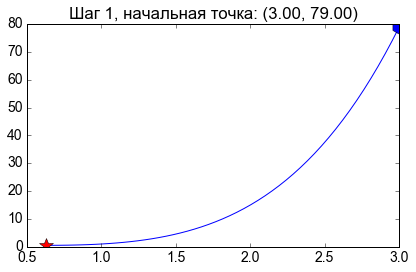

In [57]:
def interact_ng(step=1):
    vis_path_n(g, *path_ng, step=step)
    
widgets.interact(interact_ng, step=(1, len(path_ng[2])));

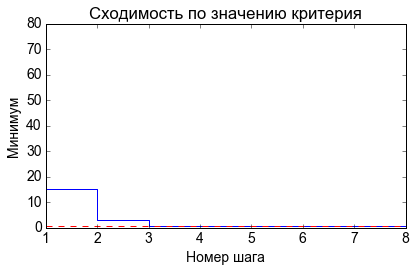

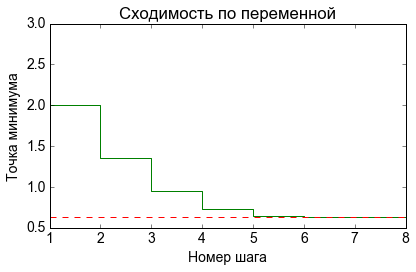

In [58]:
vis_convergence_n(path_ng, gs_xmin, gs_min)

## Аппроксимация производных конечными разностями

In [59]:
def diff_forward(f, x0, h=0.001): 
    """
    Вычисляет производную функции f(x) в точке x0 через начальную конечную разность
    
    Аргументы:
    f - функция
    x0 - координата точки для вычисления производной
    h - шаг для вычисления производной
    
    Возвращает:
    Значение производной f'(x) в точке x0    
    """
    
    return (f(x0+h) - f(x0)) / h
    
def diff_central(f, x0, h=0.001): 
    """
    Вычисляет производную функции f(x) в точке x0 через центральную конечную разность
    
    Аргументы:
    f - функция
    x0 - координата точки для вычисления производной
    h - шаг для вычисления производной
    
    Возвращает:
    Значение производной f'(x) в точке x0    
    """    
    return (f(x0+h) - f(x0-h)) / (2 * h)


def diff2_forward(f, x0, h=0.001): 
    """
    Вычисляет вторую производную функции f(x) в точке x0 через начальную конечную разность
    
    Аргументы:
    f - функция
    x0 - координата точки для вычисления производной
    h - шаг для вычисления второй производной
    
    Возвращает:
    Значение второй производной f''(x) в точке x0    
    """
    return (diff_forward(f, x0 + h, h) - diff_forward(f, x0, h)) / h

def diff2_central(f, x0, h=0.001): 
    """
    Вычисляет вторую производную функции f(x) в точке x0 через центральную конечную разность
    
    Аргументы:
    f - функция
    x0 - координата точки для вычисления производной
    h - шаг для вычисления второй производной
    
    Возвращает:
    Значение второй производной f''(x) в точке x0    
    """
    return (diff_central(f, x0 + h, h) - diff_central(f, x0 - h, h)) / (2 * h)


В пакете `numpy.misc` имеется функция [`derivative`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html#scipy.misc.derivative), позволяющая вычислить производную функции одной переменной через центральные конечные разности.

## Проверка на параболической функии (Ньютон + конечные разности)

In [60]:
fprime_forward = lambda x : diff_forward(f, x)
fsecond_forward = lambda x : diff2_forward(f, x)

path_nff  = newton_search(f, -3, fprime_forward, fsecond_forward)

Шаг	x	f(x)	x*	f(x*)	f'(x*)
1	-3.00	+12.00	+0.50	-0.25	+0.00


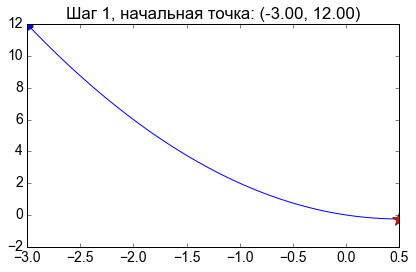

In [61]:
def interact_nff(step=1):
    vis_path_n(f, *path_nff, step=step)
    
widgets.interact(interact_nff, step=(1, len(path_nff[2])));

In [62]:
fsecond_central = lambda x : diff2_central(f, x)
fprime_central = lambda x : diff_central(f, x)

path_nfc  = newton_search(f, -3, fprime_central, fsecond_central)

Шаг	x	f(x)	x*	f(x*)	f'(x*)
1	-3.00	+12.00	+0.50	-0.25	-0.00


## Проверка на полиномиальной функии (Ньютон + конечные разности)

In [63]:
gprime_forward = lambda x : diff_forward(g, x)
gsecond_forward = lambda x : diff2_forward(g, x)

path_ngf  = newton_search(g, 3, gprime_forward, gsecond_forward)

Шаг	x	f(x)	x*	f(x*)	f'(x*)
1	+3.00	+79.00	+2.01	+15.29	+31.48
2	+2.01	+15.29	+1.36	+3.06	+9.08
3	+1.36	+3.06	+0.95	+0.87	+2.46
4	+0.95	+0.87	+0.73	+0.55	+0.54
5	+0.73	+0.55	+0.64	+0.53	+0.06
6	+0.64	+0.53	+0.63	+0.53	+0.00
7	+0.63	+0.53	+0.63	+0.53	+0.00


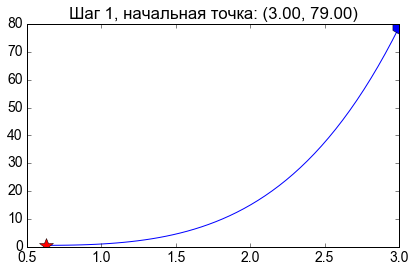

In [64]:
def interact_ngf(step=1):
    vis_path_n(g, *path_ngf, step=step)
    
widgets.interact(interact_ngf, step=(1, len(path_ngf[2])));

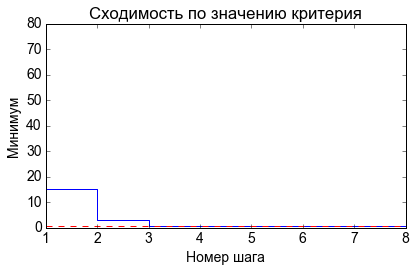

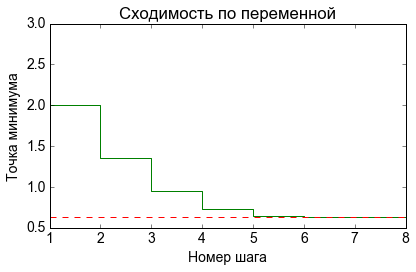

In [65]:
vis_convergence_n(path_ngf, gs_xmin, gs_min)

In [66]:
gsecond_central = lambda x : diff2_central(g, x)
gprime_central = lambda x : diff_central(g, x)

path_ngc  = newton_search(g, 3, gprime_central, gsecond_central)

Шаг	x	f(x)	x*	f(x*)	f'(x*)
1	+3.00	+79.00	+2.01	+15.29	+31.45
2	+2.01	+15.29	+1.36	+3.06	+9.07
3	+1.36	+3.06	+0.95	+0.87	+2.45
4	+0.95	+0.87	+0.73	+0.55	+0.53
5	+0.73	+0.55	+0.64	+0.53	+0.06
6	+0.64	+0.53	+0.63	+0.53	+0.00
7	+0.63	+0.53	+0.63	+0.53	+0.00


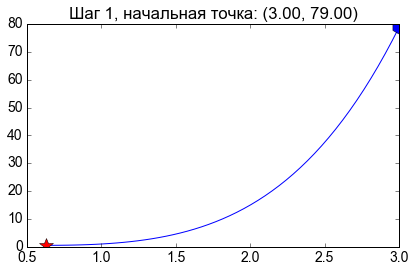

In [67]:
def interact_ngc(step=1):
    vis_path_n(g, *path_ngc, step=step)
    
widgets.interact(interact_ngc, step=(1, len(path_ngc[2])));

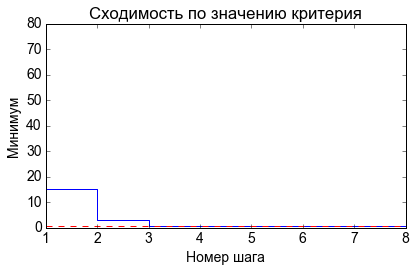

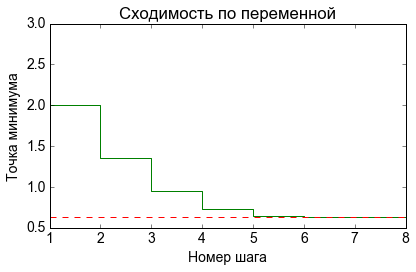

In [68]:
vis_convergence_n(path_ngc, gs_xmin, gs_min)